In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.manifoldlib as tmf

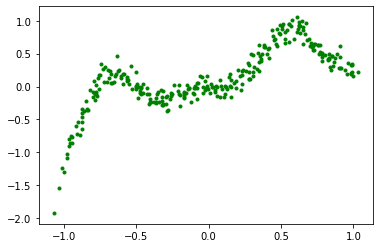

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)
xx = np.c_[x,y]

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Trying Manifolds

In [3]:
manifold = tmf.SplineManifold1D(2, 2)

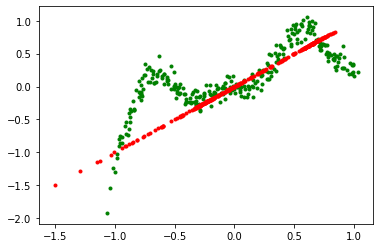

In [4]:
p1 = np.array([[-1,-1]])
p2 = np.array([[1,1]])
proj = manifold._get_projection_(xx, p1, p2)

plt.scatter(x, y, marker='.', color='g')
plt.scatter(proj[:,0], proj[:,1], marker='.', color='r')
plt.show()

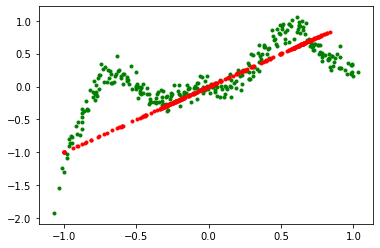

In [5]:
yy = manifold.forward(xx)
plt.scatter(x, y, marker='.', color='g')
plt.scatter(yy[:,0], yy[:,1], marker='.', color='r')
plt.show()

In [6]:
manifold.backward()
manifold.update()

In [7]:
manifold.X

array([[-1.00053675, -0.9995364 ],
       [ 0.99981354,  1.00018646]])

### Doing this in a loop

In [8]:
manifold = tmf.SplineManifold1D(2, 2)

_______________________
epoch 0
Loss 0.04437594699449536

_______________________
epoch 100
Loss 0.033779927096746765

_______________________
epoch 200
Loss 0.0328388354420798

_______________________
epoch 300
Loss 0.032660034254250694

_______________________
epoch 400
Loss 0.03259810447829004

_______________________
epoch 500
Loss 0.03255866090235174

_______________________
epoch 600
Loss 0.032526006836472277

_______________________
epoch 700
Loss 0.03249763119146023

_______________________
epoch 800
Loss 0.03247278949568229

_______________________
epoch 900
Loss 0.03245101213035134

_______________________
epoch 1000
Loss 0.03243191625398815

_______________________
epoch 1100
Loss 0.03241517086763414

_______________________
epoch 1200
Loss 0.03240048650767686

_______________________
epoch 1300
Loss 0.03238760947705428

_______________________
epoch 1400
Loss 0.03237631732884079

_______________________
epoch 1500
Loss 0.03236641499909011

_______________________
epoch 1600

_______________________
epoch 13400
Loss 0.032243892108430205

_______________________
epoch 13500
Loss 0.0322438891062676

_______________________
epoch 13600
Loss 0.032243886295888154

_______________________
epoch 13700
Loss 0.03224388366504047

_______________________
epoch 13800
Loss 0.03224388120225573

_______________________
epoch 13900
Loss 0.03224387889679781

_______________________
epoch 14000
Loss 0.032243876738616395

_______________________
epoch 14100
Loss 0.03224387471830322

_______________________
epoch 14200
Loss 0.03224387282705104

_______________________
epoch 14300
Loss 0.03224387105661522

_______________________
epoch 14400
Loss 0.03224386939927779

_______________________
epoch 14500
Loss 0.03224386784781386

_______________________
epoch 14600
Loss 0.03224386639546005

_______________________
epoch 14700
Loss 0.03224386503588502

_______________________
epoch 14800
Loss 0.03224386376316193

_______________________
epoch 14900
Loss 0.032243862571742526

_____

TclError: invalid command name "pyimage11"

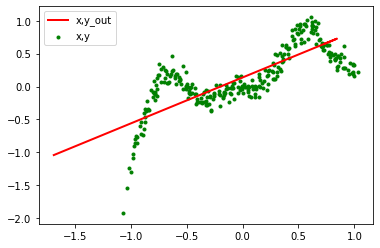

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    yy = manifold.forward(xx)
    manifold.backward()
    manifold.update(0.1)
    
    if step % 100 == 0:
        
        loss = np.mean(manifold.errors)
        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

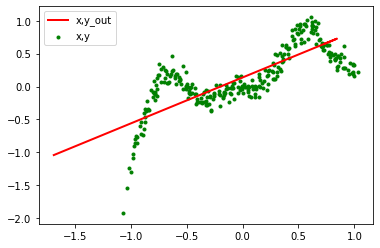

In [10]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
plt.legend()

In [11]:
manifold.X

array([[-1.68647075, -1.0426407 ],
       [ 1.08164685,  0.89412024]])

In [12]:
manifold.del_X

array([[ 1.66581526e-06,  1.21316725e-06],
       [ 1.43118818e-08, -2.04552720e-08]])

In [13]:
manifold._get_gradient_scaler_(manifold.projection, manifold.X[:1], manifold.X[1:2])

array([[0.99999994, 0.99999994],
       [0.92621664, 0.92621664],
       [0.87027159, 0.87027158],
       [0.87676469, 0.87676468],
       [0.83667752, 0.83667751],
       [0.82553515, 0.82553515],
       [0.80172397, 0.80172397],
       [0.78255317, 0.78255317],
       [0.79330865, 0.79330865],
       [0.77201297, 0.77201297],
       [0.78932958, 0.78932958],
       [0.77342824, 0.77342824],
       [0.7383332 , 0.73833319],
       [0.75637801, 0.75637801],
       [0.72484825, 0.72484825],
       [0.75492468, 0.75492468],
       [0.73739888, 0.73739888],
       [0.69391251, 0.69391251],
       [0.68448834, 0.68448834],
       [0.7168022 , 0.71680219],
       [0.70328996, 0.70328996],
       [0.68622539, 0.68622539],
       [0.65655684, 0.65655683],
       [0.67813005, 0.67813005],
       [0.67691602, 0.67691601],
       [0.67784852, 0.67784851],
       [0.62062674, 0.62062674],
       [0.6340343 , 0.6340343 ],
       [0.62047408, 0.62047407],
       [0.59275883, 0.59275883],
       [0.

_______________________
epoch 0
Loss 0.4692969100945469

_______________________
epoch 100
Loss 0.10841750141531081

_______________________
epoch 200
Loss 0.06010757051933303

_______________________
epoch 300
Loss 0.047597522014899085

_______________________
epoch 400
Loss 0.04155618932219161

_______________________
epoch 500
Loss 0.03802673090337774

_______________________
epoch 600
Loss 0.035803309518993964

_______________________
epoch 700
Loss 0.03437183698984279

_______________________
epoch 800
Loss 0.03346099432391642

_______________________
epoch 900
Loss 0.032901977601189486

_______________________
epoch 1000
Loss 0.03257715291669824

_______________________
epoch 1100
Loss 0.032400897017816774

_______________________
epoch 1200
Loss 0.032312403550957276

_______________________
epoch 1300
Loss 0.03227150656918241

_______________________
epoch 1400
Loss 0.03225414779102356

_______________________
epoch 1500
Loss 0.03224738427572454

_______________________
epoch 16


_______________________
epoch 13400
Loss 0.032243845122302765

_______________________
epoch 13500
Loss 0.03224384511275252

_______________________
epoch 13600
Loss 0.032243845112752086

_______________________
epoch 13700
Loss 0.03224384511279146

_______________________
epoch 13800
Loss 0.032243870409712334

_______________________
epoch 13900
Loss 0.03224384511303618

_______________________
epoch 14000
Loss 0.032243845112752086

_______________________
epoch 14100
Loss 0.032243845112752086

_______________________
epoch 14200
Loss 0.03224389563328739

_______________________
epoch 14300
Loss 0.03224384518899684

_______________________
epoch 14400
Loss 0.032243845112839654

_______________________
epoch 14500
Loss 0.032243845112752086

_______________________
epoch 14600
Loss 0.032243845112752086

_______________________
epoch 14700
Loss 0.03224933240691339

_______________________
epoch 14800
Loss 0.032243845155750225

_______________________
epoch 14900
Loss 0.03224384511275935

TclError: invalid command name "pyimage31"

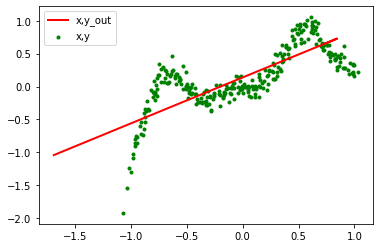

In [14]:
import mylibrary.nnlib as tnn
optimizer = tnn.Adam()
le1 = tnn.LinearLayer(2, 1, optimizer=optimizer)
ld1 = tnn.LinearLayer(1, 2, optimizer=optimizer)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    h = le1.forward(xx)
    yy = ld1.forward(h)
    
    dy = yy-xx
    dh = ld1.backward(dy)
    dx = le1.backward(dh)

    loss = (dy**2).mean()
    ld1.update()
    le1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break